## <center><font color='blue'>IICR functions for the continent-island model</font></center>

This is a test notebook for the Python package <em>continent</em>.

For an continent-island model with $n-1$ islands, $T_{k,\sigma}^{(K),n,p}$ denotes the $k$-th coalescence time where $K$ is the initial number of genes, $p$ the set of <em>migration-coalescence</em> parameters and $\sigma$ the initial state, i.e. an initial repartition of the $K$ genes in the continent and the $n-1$ islands.

The set of parameters has the form $p=[M_1,c_1,M_2,c_2]$ where
<ul>
  <li> $M_1$ is the migration rate from the continent to the islands,
  <li> $c_1$ is the coalescence rate in the continent,
  <li> $M_2$ is the migration rate from the islands to the continent,
  <li> $c_2$ is the coalescence rate in the islands.
</ul>

Denoting by $F(t)$ the cumulative distribution function $F(t) = \mbox{P}( T_{k,\sigma}^{(K),n,p} \leq t )$, the IICR is defined by
$$
\lambda_{k,\sigma}^{(K),n,p}(t) = \frac{k(k-1)}{2} \; \frac{1 - F(t)}{F'(t)}.
$$

#####  <font color='blue'> Importing some packages</font>

In [ ]:
import numpy as np
from continent import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(9.0,6.0)

### <font color='blue'>1. Graph of $\lambda_{2,\sigma}^{(2),4,p}(t)$, $0 \leq \sigma \leq 3$, $p=[1/20,1,1,20]$ for $0 \leq t \leq 10$</font> 

In [ ]:
n=4
parms=[0.05,1,1,20.0]
K=2
k=2

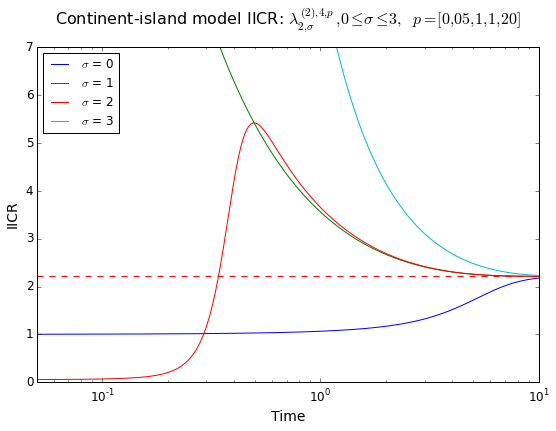

In [3]:
tmin=0.05
tmax=10+0.0011
lt = np.arange(tmin,tmax,0.01)


lim=-k*(k-1)/2/c_main_eigenvalue(n,parms,k)

tit = 'Continent-island model IICR: $\lambda_{'+str(k)+',\sigma}^{('+str(K)+'),'+str(n)+',p}, 0 \leq \sigma \leq 3,\; p=[0,05,1,1,20]$'

for st in range(0,4):
  lv = [c_mk_F_iicr(n,parms,K,k,st,t)[1]  for t in lt]
  plt.plot(lt,lv,label = "$\sigma$ = {}".format(st))
plt.plot([tmin,tmax],[lim,lim],color='red',linestyle='dashed')
plt.title(tit,fontsize=16,y=1.05)
plt.axis([tmin,tmax,0,7])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.legend(loc="best")
plt.xscale('log')
plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

The limit when $t \to + \infty$ is:

In [4]:
print 'lim =',lim

lim = 2.21076062098


### <font color='blue'>2. Graph of $\lambda_{k,0}^{(5),10,p}(t)$, $p=[0.5,1,1,2.0]$, $2 \leq k \leq 5$ for $0 \leq t \leq 8$</font> 
In the initial state, all 5 genes are located in the continent (st=0) 

In [5]:
n=10
parms=[0.5,1,1,2.0]
K=5
kmax=5
st=0 
tmin=0.001
tmax=8.0015
dt=0.1

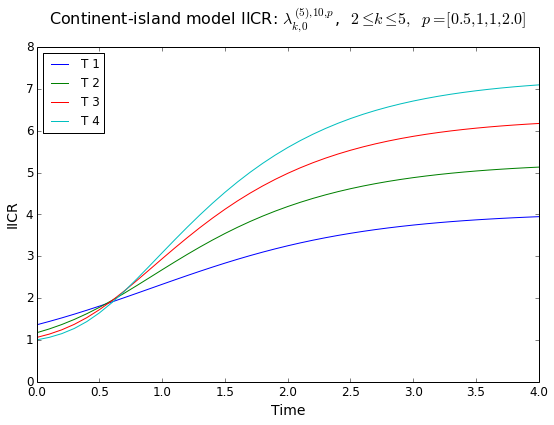

In [6]:
llpt = c_mk_fixed_K_iicrs(n,parms,K,kmax, st, tmin,tmax,dt)

tit = 'Continent-island model IICR: $\lambda_{k,'+str(st)+'}^{('+str(K)+'),'
tit += str(n)+',p}$,  $2 \leq k \leq'+str(kmax)+',\; p=[0.5,1,1,2.0]$'

for i in range(1,len(llpt)):
  plt.plot(llpt[0],llpt[i],label = "T {}".format(i))
plt.axis([0,4,0,8])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.title(tit,fontsize=16,y=1.05)
plt.legend(loc="best")
plt.show()

### <font color='blue'>3. Graph of $\lambda_{2,1}^{(K),4,p}(t)$,  $2 \leq K \leq 20$, $p=[0.5,1,1,2.0]$, $0 \leq t \leq 6$</font> 
In initial states (one for each value of K), all genes are located in the continent (st=0)

In [7]:
n=4
parms=[0.5,1,1,2.0]
Kmax=20
k=2
st=0 
t0=0.001
tmax=6.0015
dt=0.1

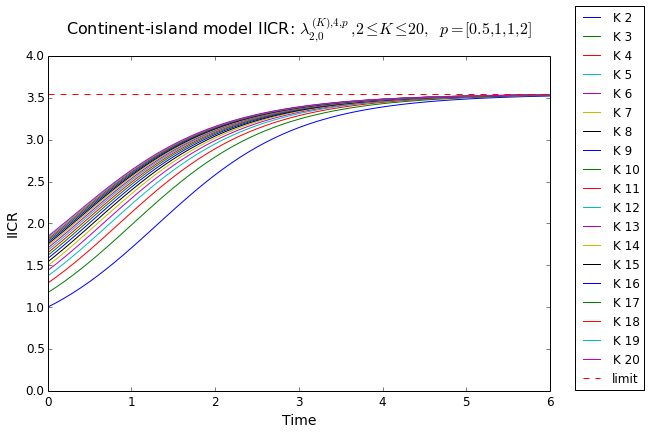

In [8]:
res= c_mk_fixed_k_iicrs(n,parms,Kmax,k,st,t0,tmax,dt)

lim=-k*(k-1)/2/c_main_eigenvalue(n,parms,k)

tit = 'Continent-island model IICR: $\lambda_{'+str(k)+',0}^{(K),'+str(n)+',p}, 2 \leq K \leq 20,\; p=[0.5,1,1,2]$'


for i in range(1,Kmax-k+2):
  plt.plot(res[:,0],res[:,i],label = "K {}".format(k+i-1))
plt.plot([0,6],[lim,lim],color='red',linestyle='dashed',label='limit')
plt.axis([0,6,0,4])
plt.xlabel('Time',fontsize=14)
plt.ylabel('IICR',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=12) 
plt.title(tit,fontsize=16,y=1.05)
plt.legend(bbox_to_anchor=(1.2,-0.015),loc=4)
plt.show()

The limit when $t \to + \infty$ is:

In [22]:
lim

3.5464389109686367